<h1><b>Importing Libraries and Exploring the Dataset</b></h1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import pandas as pd 
import re

In [2]:
data = pd.read_csv('train.csv')
data.head()

C:\Users\yboyk\AppData\Local\Temp\ipykernel_21216\2616829868.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
data.shape

(100000, 28)

In [6]:
data.isnull().any()

ID                          False
Customer_ID                 False
Month                       False
Name                         True
Age                         False
SSN                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary        True
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Type_of_Loan                 True
Delay_from_due_date         False
Num_of_Delayed_Payment       True
Changed_Credit_Limit        False
Num_Credit_Inquiries         True
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age           True
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly      True
Payment_Behaviour           False
Monthly_Balance              True
Credit_Score                False
dtype: bool

<h1><b>Data Cleaning and Preparation</b></h1>

In [7]:
cols = ['ID',
    'Customer_ID',
 'Name',
 'SSN']
data.drop(cols,axis = 1,inplace = True)

after taking a general look on the values of the different columns of the dataset here is some of the data preprocessing that needs to be done before starting classification process
* lots of nan values among different columns that needs imputation or clearing
* Cleaning numerical values wrongly typed inside numerical columns by removing non-numerical characters and converting columns type to float64 or int64
* 'Type of loan' column contains list of comma-separated values for each record, after looping throughout all the records it was finally revealed that number of unique values among all these lists is actually 10 so the idea was to create 10 new columns for each unique value present in those lists and then for each record assign 0 or 1 in the new columns based on its presence on the list in 'type of loan' column
* 'credit history age' column values were all this way 'nbr of years and nbr of months' example '22 years and 22 months' so I converted them into number of months

In [8]:
data.dropna(axis = 0,inplace = True)

In [9]:
def get_unique_counts(dataframe):
    unique_counts = dataframe.nunique()
    unique_counts_list = [(col, count) for col, count in unique_counts.items()]
    return unique_counts_list

get_unique_counts(data)

[('Month', 8),
 ('Age', 1148),
 ('Occupation', 16),
 ('Annual_Income', 15084),
 ('Monthly_Inhand_Salary', 11665),
 ('Num_Bank_Accounts', 625),
 ('Num_Credit_Card', 913),
 ('Interest_Rate', 1154),
 ('Num_of_Loan', 282),
 ('Type_of_Loan', 6259),
 ('Delay_from_due_date', 73),
 ('Num_of_Delayed_Payment', 504),
 ('Changed_Credit_Limit', 4044),
 ('Num_Credit_Inquiries', 804),
 ('Credit_Mix', 4),
 ('Outstanding_Debt', 11466),
 ('Credit_Utilization_Ratio', 58933),
 ('Credit_History_Age', 404),
 ('Payment_of_Min_Amount', 3),
 ('Total_EMI_per_month', 13516),
 ('Amount_invested_monthly', 56131),
 ('Payment_Behaviour', 7),
 ('Monthly_Balance', 58928),
 ('Credit_Score', 3)]

In [10]:
cols_to_clean = ['Age','Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 
                 'Amount_invested_monthly', 'Monthly_Balance']

# Function to convert columns to string, remove non-numeric characters, and convert to float
def clean_and_convert_to_float(data, col_name):
    # Remove non-numeric characters and convert to float
    data[col_name] = data[col_name].str.replace(r'[^0-9.]', '', regex=True)
    data[col_name] = pd.to_numeric(data[col_name], errors='coerce')  # coerce non-numeric values to NaN
    return data

# Apply the function to each column
for col in cols_to_clean:
    data = clean_and_convert_to_float(data, col)


In [11]:
# Function to split values in a string and convert to list
def split_string_to_list(value):
    # Split the string based on commas and "and" keywords
    values_list = [v.strip() for v in re.split(',|and', value)]
    return values_list


# Apply the function to the column
data['Type_of_Loan'] = data['Type_of_Loan'].apply(split_string_to_list)


In [12]:
# Function to convert duration string to total number of months
def convert_to_months(duration_str):
    # Split the string by space and extract years and months
    parts = duration_str.split()
    years = 0
    months = 0
    for i, part in enumerate(parts):
        if part == "Years" or part == "Year":
            years = int(parts[i-1])
        elif part == "Months" or part == "Month":
            months = int(parts[i-1])
    
    # Calculate total number of months
    total_months = years * 12 + months
    return total_months

# Convert duration strings to total number of months
data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_to_months)

data = data.rename(columns = {'Credit_History_Age':'Credit_History_In_Months'})

data['Credit_History_In_Months'] = data['Credit_History_In_Months'].astype('int64')

In [13]:
# Get unique items from all lists
unique_items = set(item for sublist in data['Type_of_Loan'] for item in sublist)

# Iterate over unique items and create new columns
for item in unique_items:
    data[item] = data['Type_of_Loan'].apply(lambda x: 1 if item in x else 0)

# Dropping the original 'items' column if needed
data.drop(columns=['Type_of_Loan'], inplace=True)
data = data.rename(columns = {'':'Special Loan'})

In [14]:
data.isnull().any()

Month                       False
Age                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Changed_Credit_Limit         True
Num_Credit_Inquiries        False
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_In_Months    False
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly     False
Payment_Behaviour           False
Monthly_Balance              True
Credit_Score                False
Special Loan                False
Credit-Builder Loan         False
Mortgage Loan               False
Student Loan                False
Home Equity Loan            False
Payday Loan                 False
Debt Consolida

In [15]:
data.dropna(axis = 0,inplace = True)

In [16]:
data.shape

(56748, 33)

* some of the values weren't assigned a proper nomination like this one below for instance

In [17]:
mapping = { '_______' : 'NonDetermined'}
data['Occupation'] = data['Occupation'].replace(mapping)
data['Occupation'].value_counts().to_frame()

,count
Occupation,
NonDetermined,3988
Lawyer,3791
Mechanic,3642
Doctor,3589
Entrepreneur,3576
Architect,3576
Teacher,3569
Media_Manager,3550
Scientist,3531


* those tables help showing the number of occurences of different values for categorical columns

In [18]:
mapping = { '_' : 'NotSpecified'}
data['Credit_Mix'] = data['Credit_Mix'].replace(mapping)
data['Credit_Mix'].value_counts().to_frame()

,count
Credit_Mix,
Standard,20856
Good,12362
Bad,12114
NotSpecified,11416


In [19]:
data['Payment_Behaviour'].value_counts().to_frame()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,14631
High_spent_Medium_value_payments,10026
Low_spent_Medium_value_payments,7761
High_spent_Large_value_payments,7711
High_spent_Small_value_payments,6505
Low_spent_Large_value_payments,5912
!@9#%8,4202


In [20]:
data['Credit_Score'].value_counts().to_frame()

,count
Credit_Score,
Standard,29864
Poor,17731
Good,9153


In [21]:
data['Payment_of_Min_Amount'].value_counts().to_frame()

,count
Payment_of_Min_Amount,
Yes,31791
No,18173
NM,6784


In [22]:
len(data.columns)

33

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56748 entries, 0 to 98303
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     56748 non-null  object 
 1   Age                       56748 non-null  int64  
 2   Occupation                56748 non-null  object 
 3   Annual_Income             56748 non-null  float64
 4   Monthly_Inhand_Salary     56748 non-null  float64
 5   Num_Bank_Accounts         56748 non-null  int64  
 6   Num_Credit_Card           56748 non-null  int64  
 7   Interest_Rate             56748 non-null  int64  
 8   Num_of_Loan               56748 non-null  int64  
 9   Delay_from_due_date       56748 non-null  int64  
 10  Num_of_Delayed_Payment    56748 non-null  int64  
 11  Changed_Credit_Limit      56748 non-null  float64
 12  Num_Credit_Inquiries      56748 non-null  float64
 13  Credit_Mix                56748 non-null  object 
 14  Outstanding

* checking the distribution of 1's and 0's values among newly created columns

In [24]:
type_columns = ['Special Loan', 'Payday Loan', 'Not Specified', 'Mortgage Loan',
       'Student Loan', 'Auto Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Personal Loan', 'Credit-Builder Loan']
cross_tabulations = {}
for column in type_columns:
    cross_tabulations[column] = pd.crosstab(index=data[column], columns=' ')


for col in type_columns:
    data[col] = data[col].astype('category')
# Concatenate all cross-tabulations into a single DataFrame
cross_table = pd.concat(cross_tabulations, axis=1)

cross_table

,Special Loan,Payday Loan,Not Specified,Mortgage Loan,Student Loan,Auto Loan,Debt Consolidation Loan,Home Equity Loan,Personal Loan,Credit-Builder Loan
col_0,,,,,,,,,,
0,7136,36191,36438,36659,36800,37362,36898,36790,36753,36569
1,49612,20557,20310,20089,19948,19386,19850,19958,19995,20179


* creating a list of numerical columns to be used in the checking for outliers process

In [25]:
numeric_cols = [col for col in data.columns if data[col].dtype == 'float64' or data[col].dtype == 'int64']
numeric_cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_In_Months',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

* plotting boxplots and histogramms to detect whether or not columns are having outliers 

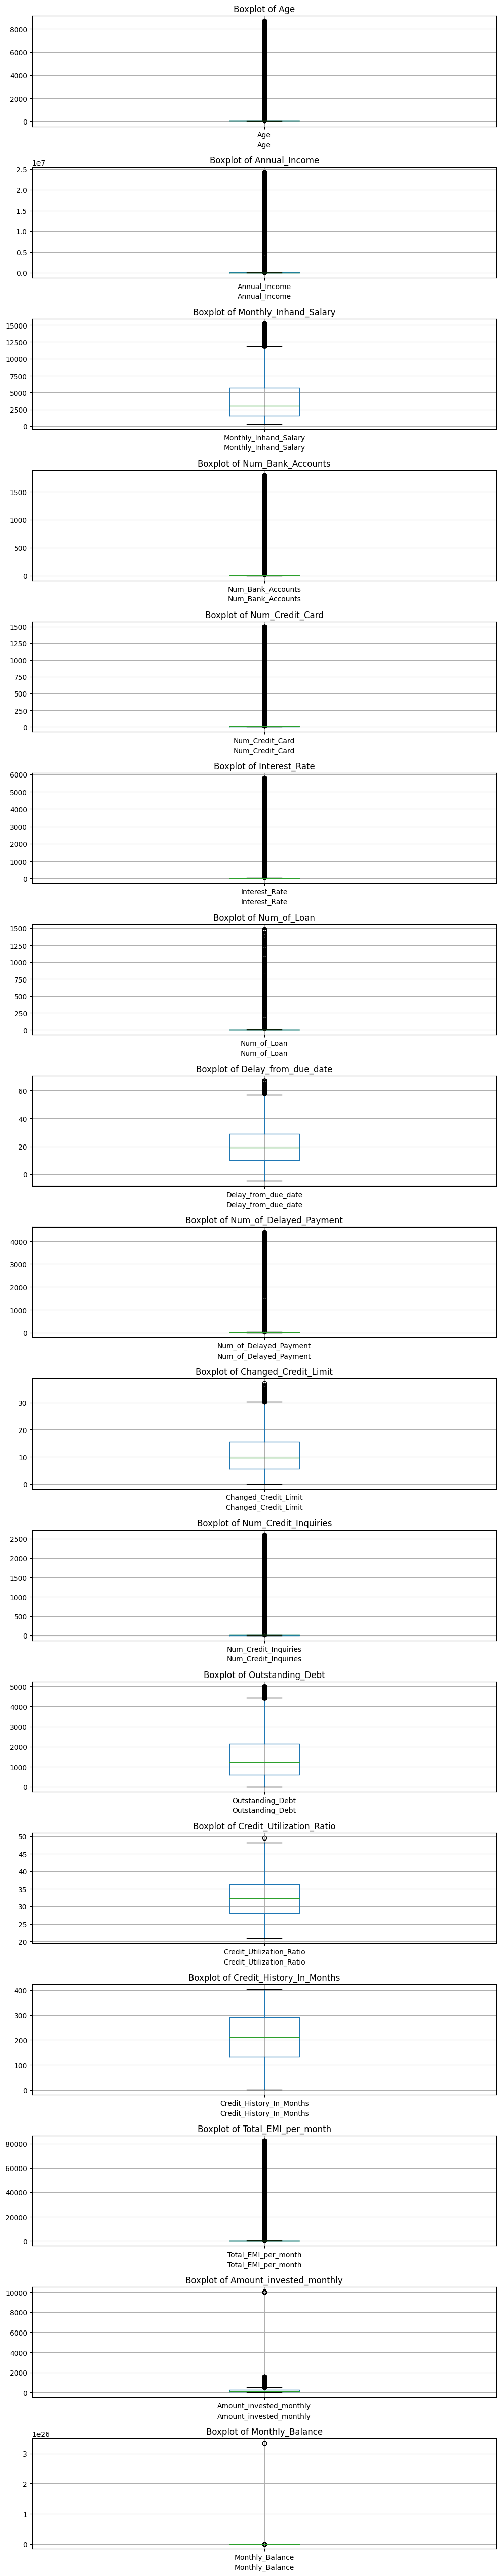

In [26]:
# Create subplots
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 3 * len(numeric_cols)))

# Plot boxplots for each column
for i, column in enumerate(numeric_cols):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [27]:
obj_cols = [col for col in data.columns if data[col].dtype == 'object']
obj_cols

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [28]:
for col in obj_cols:
    data[col] = data[col].astype('category')

In [29]:
pd.set_option('display.max_colwidth', 5000)
print(data.describe())

                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  56748.000000   5.674800e+04           56748.000000       56748.000000   
mean     120.508317   1.747390e+05            4019.170423          16.988669   
std      691.075807   1.440383e+06            3099.430583         116.151930   
min       14.000000   7.005930e+03             303.645417          -1.000000   
25%       24.000000   1.879603e+04            1571.440833           4.000000   
50%       33.000000   3.594094e+04            2980.605833           6.000000   
75%       42.000000   6.978808e+04            5699.963333           8.000000   
max     8697.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     56748.000000   56748.000000  56748.000000         56748.000000   
mean         22.695954      74.680958     11.124339            22.018080   
std         129.204994     472.974812     60.923386

In [30]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Special Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Not Specified,Personal Loan,Auto Loan
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,1,1,0,0,1,0,0,0,1,1
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,1,1,0,0,1,0,0,0,1,1
8,January,28,NonDetermined,34847.84,3037.986667,2,4,6,1,3,...,0,1,0,0,0,0,0,0,0,0
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7,...,0,1,0,0,0,0,0,0,0,0
10,March,28,Teacher,34847.84,3037.986667,2,1385,6,1,3,...,0,1,0,0,0,0,0,0,0,0


In [31]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_In_Months',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Special Loan', 'Credit-Builder Loan', 'Mortgage Loan',
       'Student Loan', 'Home Equity Loan', 'Payday Loan',
       'Debt Consolidation Loan', 'Not Specified', 'Personal Loan',
       'Auto Loan'],
      dtype='object')

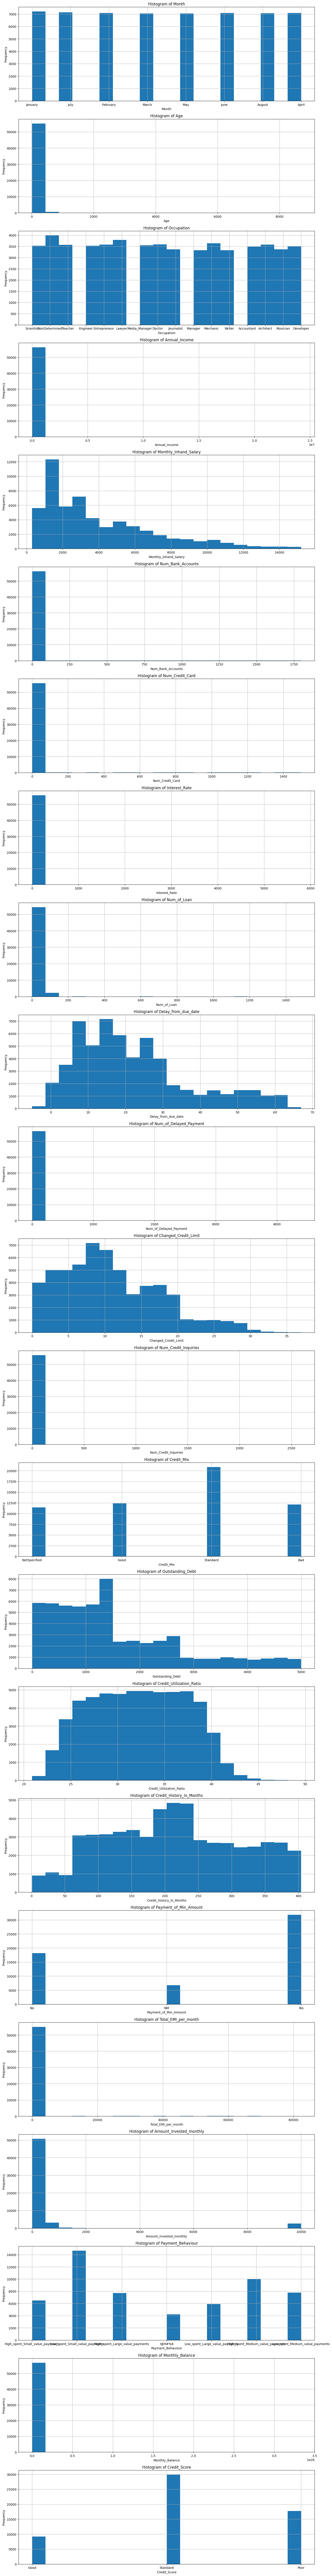

In [32]:
# Determine the number of columns for the subplot grid
num_cols = len(data.columns) - len(type_columns)

# Calculate the number of rows needed
# num_rows = (num_cols + 2) // 3  # Adjust the divisor as needed
num_rows = num_cols 
# Create subplots
# this 1 parameter indicate the number of subplots per row
fig, axes = plt.subplots(num_rows, 1, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each column except those in the exclude list
for i, column in enumerate(data.columns):
    if column not in type_columns:
        data[column].hist(ax=axes[i], orientation='vertical', bins=20)
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Hide the remaining axes
for j in range(len(data.columns) - len(type_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [33]:
data.sort_values(by = 'Age', inplace=True)
data.tail(5)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Special Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Not Specified,Personal Loan,Auto Loan
11190,July,8662,Media_Manager,95099.70,7950.975000,6,7,12,4,14,...,1,0,0,1,0,1,0,1,0,0
25095,August,8669,Accountant,29594.87,2493.239167,5,6,7,3,29,...,1,1,0,1,0,0,0,0,1,0
82335,August,8678,Mechanic,23681.87,1826.489167,3,5,15,3,9,...,1,1,1,0,0,1,0,0,0,0
35557,June,8682,Mechanic,17766.93,1219.577500,5,6,11,100,10,...,0,0,0,0,0,1,0,0,0,0
82739,April,8697,Engineer,59992.12,5265.343333,6,9,22,8,23,...,1,0,0,1,1,0,1,1,1,1


* after taking a look at the plots many histograms were right skewed and many boxplots were full of values out of the box indicating outliers presence so the next step is to remove outliers

In [34]:
data.shape

(56748, 33)

After detecting a lots of outliers among multiple columns, the process of removing them was like this, looping through numerical columns list and repeating this process for each column inside the list:
* first order the column values ascendingly
* then remove the last 3% of the values by assigning them non-values
* repeat those two steps for each column

In [35]:
except_columns = ['Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio',
                  'Credit_History_In_Months','Amount_invested_monthly']

from tqdm import tqdm
threshold_count = round(len(data) * 0.97)

for column in numeric_cols:
    if column not in except_columns:
        data.sort_values(by=column, inplace=True)
        data.reset_index(drop=True, inplace=True)
        for i in tqdm(range(threshold_count, len(data)), desc=f"Processing {column}"):
                data.at[i, column] = None

Processing Monthly_Balance: 100%|████████████████████████████████████████████████| 1702/1702 [00:00<00:00, 4188.36it/s]


In [36]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_In_Months,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,55046.000000,55046.000000,56748.000000,55046.000000,55046.000000,55046.000000,55046.000000,56748.000000,55046.000000,56748.000000,55046.000000,56748.000000,56748.000000,56748.000000,55046.000000,56748.000000,55046.000000
mean,32.875286,45952.184245,4019.170423,5.447371,5.612288,15.062493,5.296370,22.018080,13.466610,10.824877,5.968081,1510.494508,32.206154,212.955364,120.909786,628.339961,361.869252
std,10.649436,33632.671992,3099.430583,2.534023,2.054987,8.730420,11.349299,15.264293,6.033786,6.810640,3.757000,1188.981918,5.056511,99.830500,178.218794,2052.627292,158.987000
min,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.881250,1.000000,4.462837,0.000000,0.131136
25%,24.000000,18514.920000,1571.440833,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.610000,3.000000,608.790000,28.025636,134.000000,40.188627,71.909975,262.854679
50%,33.000000,35108.510000,2980.605833,6.000000,6.000000,14.000000,4.000000,19.000000,14.000000,9.700000,6.000000,1243.865000,32.239068,211.000000,75.667627,130.258040,320.845482
75%,41.000000,66092.250000,5699.963333,7.000000,7.000000,21.000000,6.000000,29.000000,18.000000,15.520000,9.000000,2139.900000,36.388170,291.000000,156.468001,250.013806,427.410192
max,56.000000,146861.120000,15204.633333,10.000000,10.000000,34.000000,100.000000,67.000000,25.000000,36.970000,15.000000,4998.070000,49.564519,404.000000,5064.000000,10000.000000,891.504844


In [37]:
data.isnull().any()

Month                       False
Age                          True
Occupation                  False
Annual_Income                True
Monthly_Inhand_Salary       False
Num_Bank_Accounts            True
Num_Credit_Card              True
Interest_Rate                True
Num_of_Loan                  True
Delay_from_due_date         False
Num_of_Delayed_Payment       True
Changed_Credit_Limit        False
Num_Credit_Inquiries         True
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_In_Months    False
Payment_of_Min_Amount       False
Total_EMI_per_month          True
Amount_invested_monthly     False
Payment_Behaviour           False
Monthly_Balance              True
Credit_Score                False
Special Loan                False
Credit-Builder Loan         False
Mortgage Loan               False
Student Loan                False
Home Equity Loan            False
Payday Loan                 False
Debt Consolida

* after cleaning columns from outliers time to remove new nan values and replot the boxplots and histogramms to see the changes 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56748 entries, 0 to 56747
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     56748 non-null  category
 1   Age                       55046 non-null  float64 
 2   Occupation                56748 non-null  category
 3   Annual_Income             55046 non-null  float64 
 4   Monthly_Inhand_Salary     56748 non-null  float64 
 5   Num_Bank_Accounts         55046 non-null  float64 
 6   Num_Credit_Card           55046 non-null  float64 
 7   Interest_Rate             55046 non-null  float64 
 8   Num_of_Loan               55046 non-null  float64 
 9   Delay_from_due_date       56748 non-null  int64   
 10  Num_of_Delayed_Payment    55046 non-null  float64 
 11  Changed_Credit_Limit      56748 non-null  float64 
 12  Num_Credit_Inquiries      55046 non-null  float64 
 13  Credit_Mix                56748 non-null  cate

In [39]:
data.isnull().sum()

Month                          0
Age                         1702
Occupation                     0
Annual_Income               1702
Monthly_Inhand_Salary          0
Num_Bank_Accounts           1702
Num_Credit_Card             1702
Interest_Rate               1702
Num_of_Loan                 1702
Delay_from_due_date            0
Num_of_Delayed_Payment      1702
Changed_Credit_Limit           0
Num_Credit_Inquiries        1702
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_In_Months       0
Payment_of_Min_Amount          0
Total_EMI_per_month         1702
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1702
Credit_Score                   0
Special Loan                   0
Credit-Builder Loan            0
Mortgage Loan                  0
Student Loan                   0
Home Equity Loan               0
Payday Loan                    0
Debt Consolidation Loan        0
Not Specif

In [40]:
data.dropna(axis = 0,inplace = True)

In [41]:
data.shape

(42240, 33)

In [42]:
# Determine the number of columns for the subplot grid
num_cols = len(data.columns) - len(type_columns)

# Calculate the number of rows needed
# num_rows = (num_cols + 2) // 3  # Adjust the divisor as needed
num_rows = num_cols 
# Create subplots
# this 1 parameter indicate the number of subplots per row
fig, axes = plt.subplots(num_rows, 1, figsize=(25, 10 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each column except those in the exclude list
for i, column in enumerate(data.columns):
    if column not in type_columns:
        data[column].hist(ax=axes[i], orientation='vertical', bins=20)
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Hide the remaining axes
for j in range(len(data.columns) - len(type_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


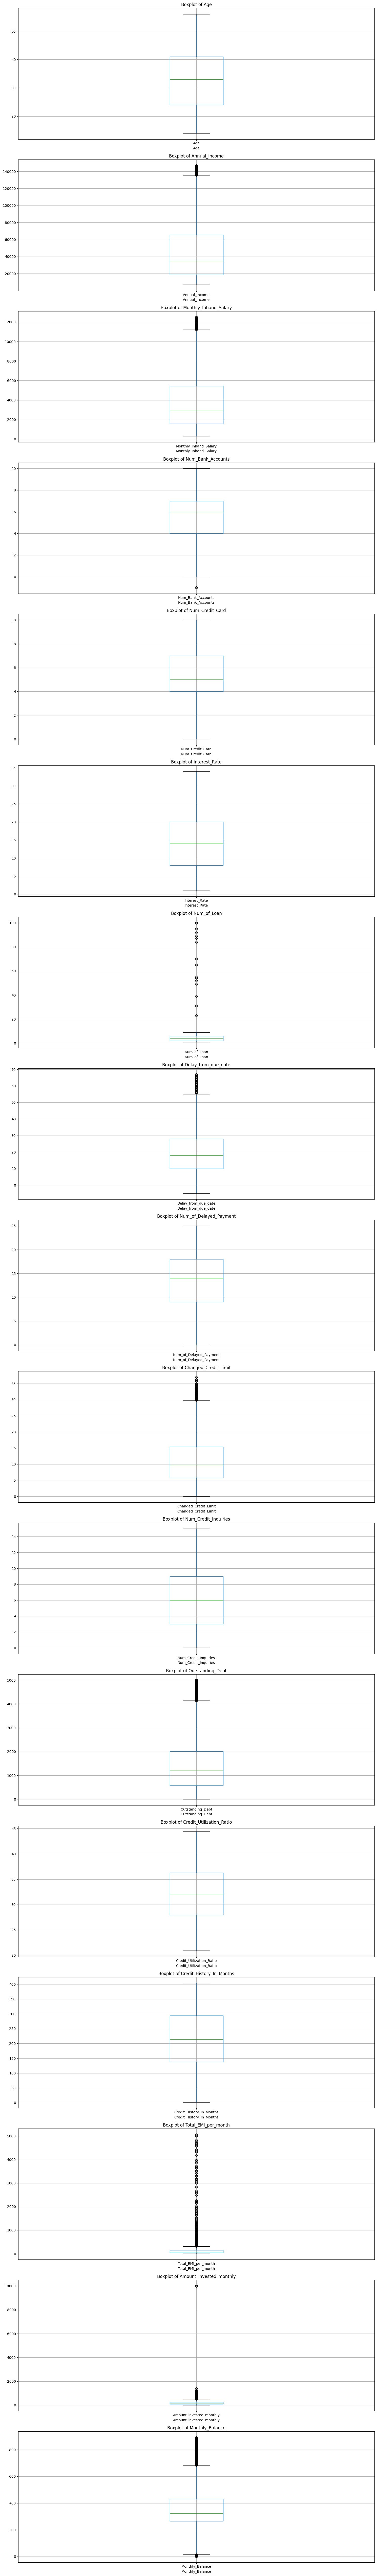

In [43]:
# Create subplots
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(15, 6 * len(numeric_cols)))

# Plot boxplots for each column
for i, column in enumerate(numeric_cols):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


In [44]:
# Iterate over the columns and convert them accordingly
for col in numeric_cols:
    # Check if all values in the column have .0 as their decimal part
    if data[col].apply(lambda x: x % 1 == 0).all():
        data[col] = data[col].astype(int)  # Convert to int if all values have .0 as their decimal part
    else:
        data[col] = data[col].astype(float)  # Otherwise, keep as float


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42240 entries, 0 to 55045
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     42240 non-null  category
 1   Age                       42240 non-null  int32   
 2   Occupation                42240 non-null  category
 3   Annual_Income             42240 non-null  float64 
 4   Monthly_Inhand_Salary     42240 non-null  float64 
 5   Num_Bank_Accounts         42240 non-null  int32   
 6   Num_Credit_Card           42240 non-null  int32   
 7   Interest_Rate             42240 non-null  int32   
 8   Num_of_Loan               42240 non-null  int32   
 9   Delay_from_due_date       42240 non-null  int32   
 10  Num_of_Delayed_Payment    42240 non-null  int32   
 11  Changed_Credit_Limit      42240 non-null  float64 
 12  Num_Credit_Inquiries      42240 non-null  int32   
 13  Credit_Mix                42240 non-null  category


* ordinally encoding categorical columns

In [46]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and label encode each one
for col in obj_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [47]:
data.shape

(42240, 33)

In [48]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Special Loan,Credit-Builder Loan,Mortgage Loan,Student Loan,Home Equity Loan,Payday Loan,Debt Consolidation Loan,Not Specified,Personal Loan,Auto Loan
0,6,30,5,56784.54,4948.045000,8,5,17,4,12,...,1,0,1,0,1,0,0,1,0,0
1,1,36,15,67845.56,5177.606477,3,5,20,4,21,...,1,0,1,0,0,1,0,0,0,1
3,7,48,13,58210.38,4681.865000,2,5,3,4,8,...,1,0,0,0,0,0,1,0,1,0
4,7,22,5,81538.76,6401.271187,9,7,18,5,46,...,1,1,0,0,1,1,0,0,1,0
8,4,35,14,55719.18,4689.265000,8,7,18,5,37,...,1,0,0,0,1,1,0,0,0,1


In [49]:
data.isnull().any().any()

False

* saving the cleaned dataset to work with in another notebook

In [51]:
data.to_csv('credit_score_index.csv',index = False)